# Differential gene expression analysis and population genetics

## Masaomi Hatakeyama

# Practice

1. Differential gene expression analysis
2. Nucleotide diversity and Tajima's D

based on *Arabidopsis kamchatica* sequencing data

# How to use Jypter notebook

- You can run this *cell* by typing CTRL+ENTER or from the menu.
    - There are two types of cells: markdown, code
- Double click goes into the edit mode
- Down arrow key moves onto the next cell
- `?` after an object/function for help
- *Restart* when stuck


In [ ]:
print("hello, world")

In [ ]:
plot(sin)

You can run the cells out of order, but **variables** are saved.

In [ ]:
x <- 123

In [ ]:
print(x)

# Target species

- *Arabidopsis kamchatica*
    - Allo-tetraploid
    - originated from *A. halleri and A. lyrata*

- DNA and RNA sequencing (Illumina HiSeq at FGCZ)

Reference
- Tim Paape, et. al, **Conserved but Attenuated Parental Gene Expression in Allopolyploids: Constitutive Zinc Hyperaccumulation in the Allotetraploid Arabidopsis kamchatica**, *Molecular biology and evolution*,  2016
- http://mbe.oxfordjournals.org/content/early/2016/08/31/molbev.msw141.abstract

# *Arabidopsis kamchatica*

![kamchatica](png/kamchatica1.png)


# 25 accessions re-sequencing

![map](png/map.png)

# Homeolog (Homoeolog)

![homeolog](png/homeolog.png)

# Exeriment: heavy metal stress imposing

![experiment](png/experiment.png)

# FGCZ NGS system workflow

0. (B-Fabric registration & project request & kickoff meeting)
1. B-Fabric sample ordering & submit (User)
2. ManGO (LIMS) input (Staff)
3. Sequencing (HTS, NGS)
4. Demultiplexing (Auto)
5. gStore (File server) imporing (Auto)
6. SUSHI (Application server) importing (Auto)
7. Quality control (Auto on SUSHI)

----
- B-Fabric http://fgcz-bfabric.uzh.ch
- ManGO http://fgcz-mango.uzh.ch
- SUSHI http://fgcz-sushi.uzh.ch

# Differential gene expression analysis workflow

1. (RNA sequencing (RNAseq))
2. Quality control
3. Mapping (to a reference genome)
4. Counting
5. CountQC
6. Compare gene expressions in two groups (edgeR, DESeq2)

---
- *This workflow is implemented on [SUSHI](http://fgcz-sushi-demo.uzh.ch)*
- edgeR http://bioconductor.org/packages/release/bioc/html/edgeR.html
- DESeq2 https://bioconductor.org/packages/release/bioc/html/DESeq2.html

# Differential gene expression analysis workflow

![deg](png/count_based_deg.png)

- Simon Anders, et al., Count-based differential expression analysis of RNA sequencing data using R and Bioconductor, Nature Protocols, 2013, 8(9), 1765

# Homeolog separation

It is tetraploid and we need separate the reads into each homeolog

- HomeoRoq: Homeolog Ratio and quantification
- Akama S, et.al, Nucleic Acids Res. 2014
- http://seselab.org/homeoroq/


# HomeoRoq

![homeoroq](png/homeoroq.png)

# Quality control (FastQC)

Check
- Seuqneced base quality (error)
- Number of sequenced reads
- Read length distribution
- Contamination
- etc.

# FASTQ format

    @HWI-D00647:25:C4P50ANXX:1:1101:1914:1994:0:N:0:AGGCAGAAAAGGCTAT
    TAAAAGCATCAAAGTTTTTATAAATTTTTTATCCAACTTAAACATTTTTTTCCTCCTA
    +
    <>BGGGGGCGGGGGGGGGGG>GGGGGGGGGGGEGGGGEGGGGGGGGGGGGGG>GGBGG

1. @ Read ID
2. Sequence
3. Nothing
4. Base quality


# FASTA format

    > AT1G51370.2 | F-box/RNI-like/FBD-like domains-containing protein
    ATGGTGGGTGGCAAGAAGAAAACCAAGATATGTGACAAAGTGTCACATG
    TTTGATATCTGAAATACTTTTTCATCTTTCTACCAAGGACTCTGTCAGAA
    TTTGGCAATCGGTTCCTGGATTGGACTTAGACCCCTACGCATCCTCAAAT
 
1. *>* Annotation information 
2. Sequence


# Phred quality score

![homeoroq](png/quality_score.png)

---
- Wikipedia https://en.wikipedia.org/wiki/Phred_quality_score

# FastQC example

http://....

# Run CountQC on SUSHI

1. Select your project
2. Select the count DataSet (Akam_leaf_count)
3. Click **CountQCApp** button
4. Confirm the parameters, and click **Next** button
5. **Submit**

(Coffee break)

---
Demo SUSHI: http://fgcz-sushi-demo.uzh.ch 

# Project number

|Project|Name||Project|Name|
|-|-|-|-|-|
|1001|Izzet||1017|Faina
|1002|José Luis||1018|Purnima
|1003|Vardan||1019|Mohd Assaad 
|1004|Lukas||1020|Krishnan 
|1005|Erica||1021|Markus
|1006|Pietro||1022|Song 
|1007|Carina||1023|Kasia
|1008|Anna||1024|Daniel
|1009|Livia||1025|Matthias 
|1010|Alik||1026|Natalie
|1011|Alexandra||1027|Samuel
|1012|Philipp||1028|Ting-Ying 
|1013|Safaeizadeh||1029|Michèle
|1014|Hannes||1030|Stefania
|1015|Christian||1031|Marco
|1016|Dunja||1032|


# Check CountQC result

1. Go to the result DataSet (CountQC_Akam_leaf_count)
2. Click **index00.html** (Static Report [Link])


# Confirm job script

1. Go to the result DataSet
2. Click **Go Job Script&Log** button
3. Click **JobScript** link

Note
- You can run this job script again on command line terminal if the job fails


# Run edgeR on SUSHI

1. Select your project
1. Select the count DataSet (Akam_leaf_count)
2. Click **edgeRApp** button
3. Select control and target samples
4. **Submit**

(Coffee break)

# Run edgeR without SUSHI

1. (Install edgeR on your R environment (e.g. RStudio)
2. Load count data on your R environment
3. Run commands
---
- Reference: [UserGuide](https://bioconductor.org/packages/devel/bioc/vignettes/edgeR/inst/doc/edgeRUsersGuide.pdf)
- RStudio (FGCZ with B-Fabric account): http://fgcz-rstudio.uzh.ch/

In [1]:
# install edgeR: run this only once
source("https://bioconductor.org/biocLite.R")
biocLite("edgeR")

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘edgeR’



The downloaded binary packages are in
	/var/folders/7d/lqktp_217wxfnv54tp2d54l00000gp/T//RtmpF9sqSk/downloaded_packages


Old packages: 'data.table', 'limma', 'mgcv', 'survival'


In [2]:
# load edgeR library
library(edgeR)

Loading required package: limma


In [25]:
# load count data
count_table <- read.table("http://fgcz-sushi-demo.uzh.ch/projects/p1000/CountQC_Akam_leaf_count_2016-11-30--10-26-57/Count_QC/Count_QC-raw-count.txt", header=T, row.names=1, sep="\t")
head(count_table)

,Ahal_L0_1_hal_home,Ahal_L0_2_hal_home,Ahal_L0_3_hal_home,Ahal_LZ_1_hal_home,Ahal_LZ_2_hal_home,Ahal_LZ_3_hal_home,AkamMUR_L0_1_hal_home,AkamMUR_L0_1_lyr_home,AkamMUR_L0_2_hal_home,AkamMUR_L0_2_lyr_home,⋯,AkamSYN_LZ_2_hal_home,AkamSYN_LZ_2_lyr_home,AkamSYN_LZ_3_hal_home,AkamSYN_LZ_3_lyr_home,Alyr_L0_1_lyr_home,Alyr_L0_2_lyr_home,Alyr_L0_3_lyr_home,Alyr_LZ_1_lyr_home,Alyr_LZ_2_lyr_home,Alyr_LZ_3_lyr_home
g00001,258,204,190,166,197,198,200,312,141,322,⋯,169,227,87,103,153,134,150,180,198,64
g00002,525,491,631,324,480,482,202,111,158,63,⋯,406,274,169,159,617,561,494,413,459,156
g00003,135,102,157,82,134,126,97,14,67,5,⋯,151,160,52,87,128,171,103,79,136,35
g00004,5,38,18,2,17,8,10,0,8,0,⋯,5,4,11,12,66,35,28,35,101,18
g00005,186,213,176,152,218,188,50,73,50,46,⋯,168,45,95,51,101,178,83,146,206,59
g00006,448,417,442,375,458,472,348,295,208,159,⋯,437,234,180,108,190,189,174,194,300,83


In [15]:
# select only Ahalleri count
counts <- count_table[, c(1:6)]
head(counts)

,Ahal_L0_1_hal_home,Ahal_L0_2_hal_home,Ahal_L0_3_hal_home,Ahal_LZ_1_hal_home,Ahal_LZ_2_hal_home,Ahal_LZ_3_hal_home
g00001,258,204,190,166,197,198
g00002,525,491,631,324,480,482
g00003,135,102,157,82,134,126
g00004,5,38,18,2,17,8
g00005,186,213,176,152,218,188
g00006,448,417,442,375,458,472


In [16]:
# set groups

group <- factor(c("Control", "Control", "Control", "Zinc", "Zinc","Zinc"))

In [17]:
# according to UserGuide
design <- model.matrix(~ group)
d <- DGEList(counts = counts, group = group)
d <- calcNormFactors(d)
d <- estimateGLMCommonDisp(d, design)
d <- estimateGLMTrendedDisp(d, design)
d <- estimateGLMTagwiseDisp(d, design)

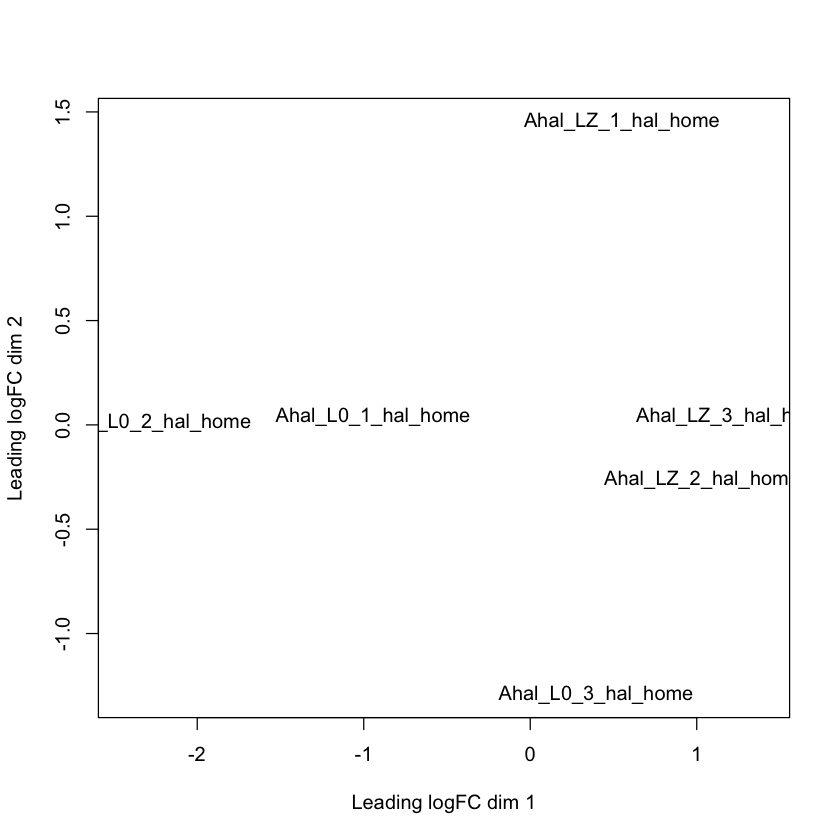

In [18]:
# plot Multi-dimensional scaling
plotMDS(d)

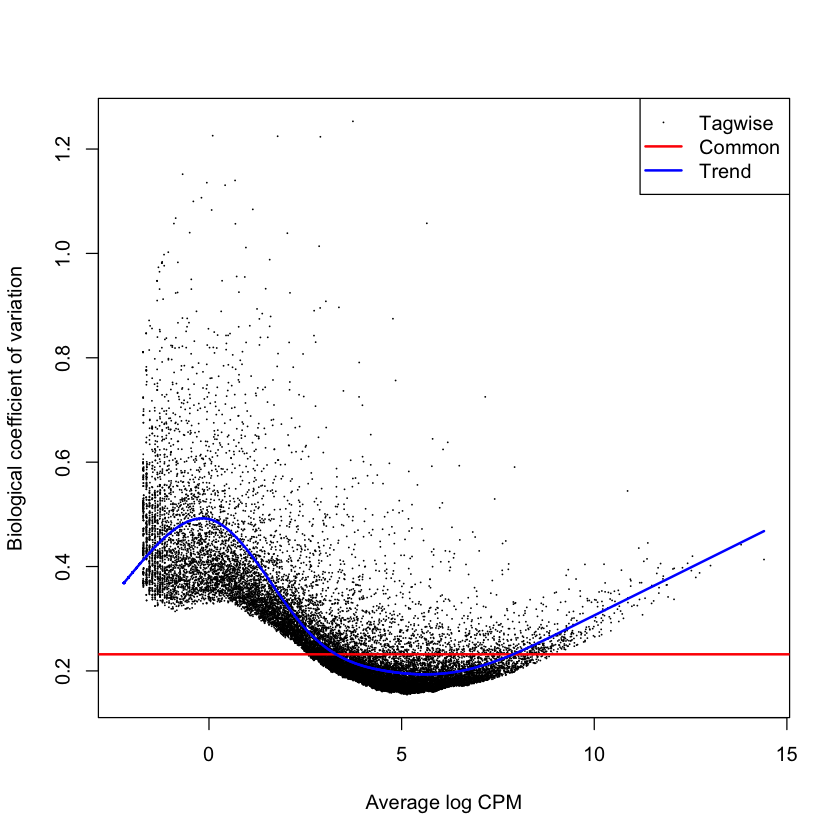

In [19]:
# plot BCV: Biological Coefficient of Variation
plotBCV(d)

In [20]:
# GLM fit
 fit <- glmFit(d, design)
 lrt <- glmLRT(fit, coef = 2)
 topTags(lrt)

,logFC,logCPM,LR,PValue,FDR
g26008,-3.622880,4.324937,148.32646,4.025032e-34,1.310269e-29
g27591,-3.080195,5.711193,118.33023,1.467958e-27,2.389322e-23
g21677,-3.348639,3.897990,105.23336,1.085665e-24,1.178055e-20
g24791,-3.257941,3.533971,97.11689,6.535310e-23,5.318598e-19
g22389,-2.213022,6.236381,93.87065,3.368326e-22,2.192982e-18
g02370,-2.693082,3.642771,84.71082,3.453545e-20,1.873721e-16
g13437,2.481377,6.261878,79.67659,4.409940e-19,2.050811e-15
g14383,2.560777,3.649520,78.52015,7.918639e-19,3.222193e-15
g13529,-2.555737,7.892413,77.63995,1.236441e-18,4.472207e-15
g25789,-4.796223,3.317257,74.06890,7.543740e-18,2.455714e-14


DEG: 1033

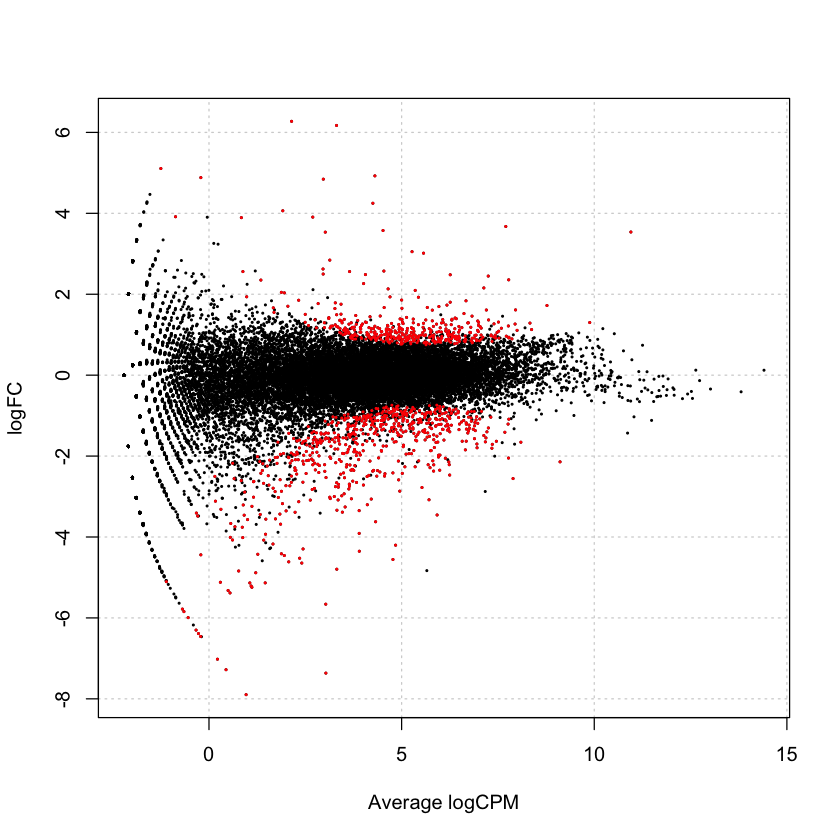

In [24]:
# MA plot
table <- as.data.frame(topTags(lrt, n = nrow(counts)))
is.DEG <- as.logical(table$FDR < 0.01)
cat(paste("DEG:", length(which(is.DEG==TRUE))))
DEG.names <- rownames(table)[is.DEG]
plotSmear(lrt, de.tags = DEG.names)

# Exercise

Detect DEGs between control and zinc treatment
    - kamMUR (A. kamchatica, Murodo, Japan)
    - kamPAK (A. kamchatica, Potter,  Alaska)

# Population genetics analysis workflow

1. DNA sequencing
    2. Mapping / SNP calling
    2. Assembly / Multiple alignment
4. Calculate  statistics

![pi](png/pi.png)

# Tajima's D

![tajimad](png/tajimad.png)

# ND and TD around HMA4 in *A. kamchatica*

![hma4_nd_td](png/fig.5.jpg)


# Tajima's D

D > 0
- many high heterozygous sites
- Balancing selection
- population size decrease quickly

D < 0
- Many low heterozygous sites
- Positive/negative selection
- Population size increase quickly


# Negative Tajima's D

Positive natural selection
- Advantageous genes are diffused faster than mutation
- It causes low π
- and D < 0

Rapidly increasing population
- New alleles with low heterozygosity increase
- It causes low π
- and D < 0


In [26]:
# install and load PopGenome package
install.packages("PopGenome")
library(PopGenome)

also installing the dependencies ‘bit’, ‘ff’




The downloaded binary packages are in
	/var/folders/7d/lqktp_217wxfnv54tp2d54l00000gp/T//RtmpF9sqSk/downloaded_packages


Loading required package: ff
Loading required package: bit
Attaching package bit
package:bit (c) 2008-2012 Jens Oehlschlaegel (GPL-2)
creators: bit bitwhich
coercion: as.logical as.integer as.bit as.bitwhich which
operator: ! & | xor != ==
querying: print length any all min max range sum summary
bit access: length<- [ [<- [[ [[<-
for more help type ?bit

Attaching package: ‘bit’

The following object is masked from ‘package:base’:

    xor

Attaching package ff
- getOption("fftempdir")=="/var/folders/7d/lqktp_217wxfnv54tp2d54l00000gp/T//RtmpF9sqSk"

- getOption("ffextension")=="ff"

- getOption("ffdrop")==TRUE

- getOption("fffinonexit")==TRUE

- getOption("ffpagesize")==65536

- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes

- getOption("ffbatchbytes")==16777216 -- consider a different value for tuning your system

- getOption("ffmaxbytes")==536870912 -- consider a different value for tuning your system


Attaching package: ‘ff’



In [35]:
# load multiple aligned fasta files
#GENOME.class <- readData("http://ieu-kenlab-wiki.uzh.ch/shimiwiki/uploads/bio673/HMA4_aligned_fasta_Ahal_origin")
GENOME.class <- readData("HMA4_aligned_fasta_Ahal_origin")
GENOME.class@n.sites

|            :            |            :            | 100 %
|====================================================


AT2G18750.fasta AT2G19010.fasta AT2G19050.fasta AT2G19060.fasta AT2G19070.fasta 
           1806             597             798             987            1299 
AT2G19080.fasta AT2G19090.fasta AT2G19110.fasta AT2G19130.fasta AT2G19150.fasta 
            900            2412            2802            2403             669 
AT2G19160.fasta AT2G19170.fasta AT2G19490.fasta 
           1206            2343            1200

In [38]:
# calculate nucleotide diversity 
GENOME.class <- diversity.stats(GENOME.class)
nd <- GENOME.class@nuc.diversity.within/GENOME.class@n.sites
nd

|            :            |            :            | 100 %
|====================================================

,pop 1
AT2G18750.fasta,0.0036573993
AT2G19010.fasta,0.0001675042
AT2G19050.fasta,0.0018071495
AT2G19060.fasta,0.0009491815
AT2G19070.fasta,0.0037964426
AT2G19080.fasta,0.0023859649
AT2G19090.fasta,0.0004669634
AT2G19110.fasta,0.0008302340
AT2G19130.fasta,0.0007534442
AT2G19150.fasta,0.0009361970


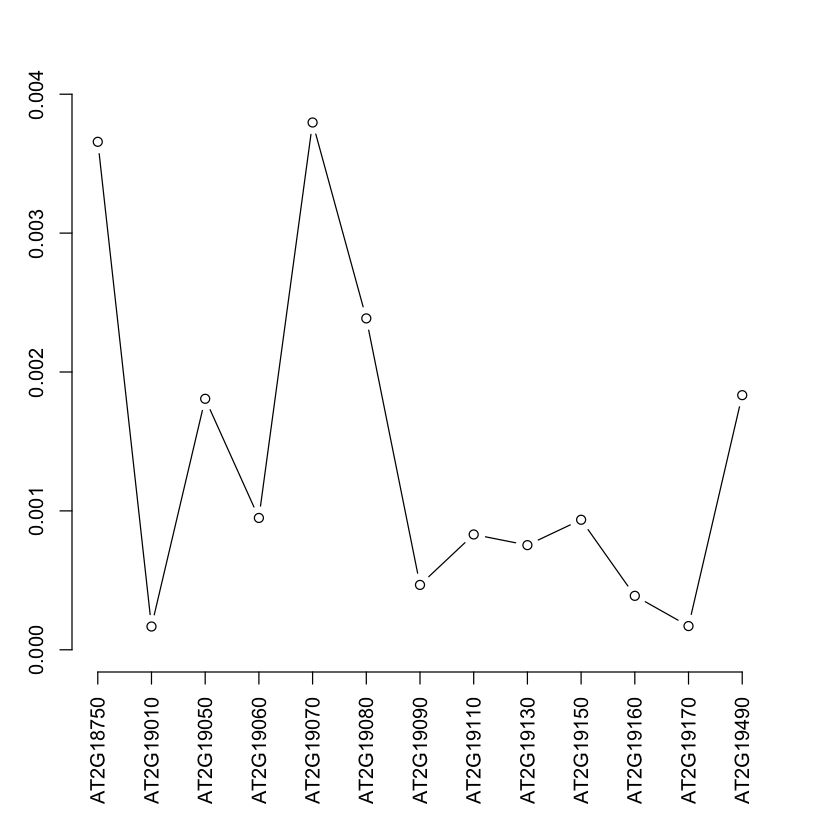

In [87]:
# plot
xlabel <- gsub(".fasta", "", GENOME.class@region.names)
par(mar=c(7,3,3,3))
plot(nd, type="b", ylab="pi", xlab="", ylim=c(0,0.004), axes=FALSE)
axis(side=1, at=1:length(xlabel),labels=xlabel, las=2)
axis(side=2)

In [89]:
GENOME.class <- neutrality.stats(GENOME.class)
td <- GENOME.class@Tajima.D
td

|            :            |            :            | 100 %
|====================================================

,pop 1
AT2G18750.fasta,-2.05610051
AT2G19010.fasta,-1.16439105
AT2G19050.fasta,-0.46941529
AT2G19060.fasta,-1.42150859
AT2G19070.fasta,-1.37000473
AT2G19080.fasta,-0.16080597
AT2G19090.fasta,-1.41104112
AT2G19110.fasta,0.10665582
AT2G19130.fasta,-0.66426346
AT2G19150.fasta,0.26026355


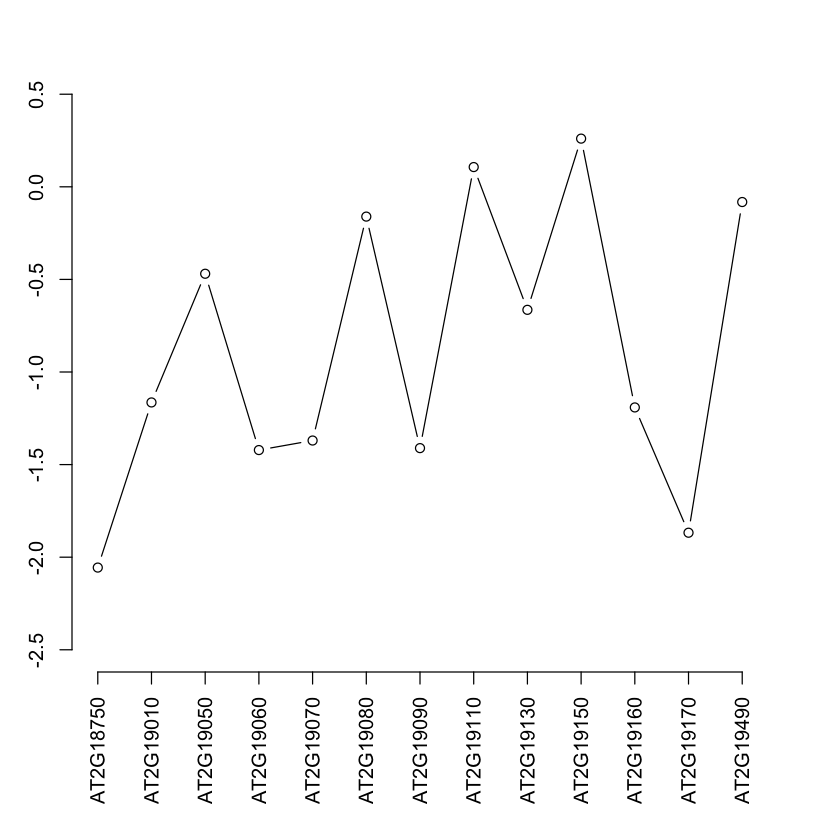

In [91]:
# plot
xlabel <- gsub(".fasta", "", GENOME.class@region.names)
par(mar=c(7,3,3,3))
plot(td, type="b", ylab="pi", xlab="", ylim=c(-2.5,0.5), axes=FALSE)
axis(side=1, at=1:length(xlabel),labels=xlabel, las=2)
axis(side=2)

# Exercise

Calculate and plot
    - Nucleotide diversity 
    - Tajima's D

of *A. lyrata* side homeolog
